<a href="https://colab.research.google.com/github/Mtab-cyber/PCSE23_13/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
ACCESS_TOKEN="1504889196539834368-pNnsxjfSebxUE2raPXcNLENvewmte0"
ACCESS_TOKEN_SECRET="P1NIV9kpBFT2GVEHpT6n7r0A6mKmms1i8vah6LQPitNfu"
CONSUMER_KEY="xazSVEcvwzMuqzPh1GAE2oydh"
CONSUMER_SECRET="WR0jPEWtTZSaoeJknB18YqoBfn6GZ2UbIQsX5qR6BnEqqtm4Zz"

In [ ]:
#Create auth obj
authenticate = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

#Set the access token 
authenticate.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)

#Create the API
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [ ]:
#Extract 100 Tweets from the user
posts = api.user_timeline(screen_name="POTUS",count=1000,lang="en",tweet_mode="extended")

#print some tweets
print("Showing some tweets\n")
i = 1
for tweet in posts:
  print(str(i)+') '+tweet.full_text+'\n')
  i+=1

Showing some tweets

1) ARPA-H will have a singular purpose: to drive breakthroughs in cancer, Alzheimer’s, and diabetes, and more. 

We can do this. https://t.co/B2iuDWUFAf

2) Today, Experian, Equifax and TransUnion announced that they’ll no longer record most medical debt on credit reports. This is a step in the right direction, thanks to @CFPB. We'll keep fighting for consumers - from increasing transparency to preventing surprise billing and more. https://t.co/UabDxsqXFI

3) Tune in as I meet with researchers and patients to discuss ARPA-H – a new cutting-edge health research agency that will accelerate progress on curing cancer and other health innovations. https://t.co/6Ze8rx9Iw9

4) Getting students back in the classroom was one of my top priorities when I took office — and thanks to my American Rescue Plan, more than 99% of our schools are safely open for in-person learning. Last week, I got to hear from a few future presidents about why that matters. https://t.co/PYvkHwmPjq



In [ ]:
#Create a data frame 
df = pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

#Showing some of the data
df.head()

,Tweets
0,ARPA-H will have a singular purpose: to drive ...
1,"Today, Experian, Equifax and TransUnion announ..."
2,Tune in as I meet with researchers and patient...
3,Getting students back in the classroom was one...
4,I’m proud of all the athletes competing in thi...


In [ ]:
#Clean the text

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed  @mentions
  text = re.sub(r'#','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/S+','',text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,ARPA-H will have a singular purpose: to drive ...
1,"Today, Experian, Equifax and TransUnion announ..."
2,Tune in as I meet with researchers and patient...
3,Getting students back in the classroom was one...
4,I’m proud of all the athletes competing in thi...
...,...
195,Someone with the wisdom to appreciate that the...
196,"During this process, I looked for someone who ..."
197,Tune in as I deliver remarks on my nomination ...
198,: Janna and I are incredibly happy for Ketanji...


In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#to get Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,ARPA-H will have a singular purpose: to drive ...,0.500000,0.500000
1,"Today, Experian, Equifax and TransUnion announ...",0.347143,0.297143
2,Tune in as I meet with researchers and patient...,0.414773,0.005682
3,Getting students back in the classroom was one...,0.221296,0.111111
4,I’m proud of all the athletes competing in thi...,0.550000,0.400000
...,...,...,...
195,Someone with the wisdom to appreciate that the...,0.457143,0.238095
196,"During this process, I looked for someone who ...",0.000000,0.000000
197,Tune in as I deliver remarks on my nomination ...,0.000000,0.000000
198,: Janna and I are incredibly happy for Ketanji...,0.812500,0.400000


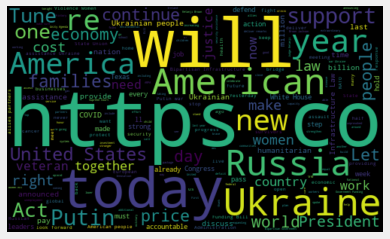

In [ ]:
#WordCloud  Plot
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative, positive and neutral analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,ARPA-H will have a singular purpose: to drive ...,0.500000,0.500000,Positive
1,"Today, Experian, Equifax and TransUnion announ...",0.347143,0.297143,Positive
2,Tune in as I meet with researchers and patient...,0.414773,0.005682,Positive
3,Getting students back in the classroom was one...,0.221296,0.111111,Positive
4,I’m proud of all the athletes competing in thi...,0.550000,0.400000,Positive
...,...,...,...,...
195,Someone with the wisdom to appreciate that the...,0.457143,0.238095,Positive
196,"During this process, I looked for someone who ...",0.000000,0.000000,Neutral
197,Tune in as I deliver remarks on my nomination ...,0.000000,0.000000,Neutral
198,: Janna and I are incredibly happy for Ketanji...,0.812500,0.400000,Positive


In [ ]:
#Print all off the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+') '+sortedDF['Tweets'][i]+'\n')
    j+=1

1) ARPA-H will have a singular purpose: to drive breakthroughs in cancer, Alzheimer’s, and diabetes, and more. 

We can do this. https://t.co/B2iuDWUFAf

2) Today, Experian, Equifax and TransUnion announced that they’ll no longer record most medical debt on credit reports. This is a step in the right direction, thanks to . We'll keep fighting for consumers - from increasing transparency to preventing surprise billing and more. https://t.co/UabDxsqXFI

3) Tune in as I meet with researchers and patients to discuss ARPA-H – a new cutting-edge health research agency that will accelerate progress on curing cancer and other health innovations. https://t.co/6Ze8rx9Iw9

4) Getting students back in the classroom was one of my top priorities when I took office — and thanks to my American Rescue Plan, more than 99% of our schools are safely open for in-person learning. Last week, I got to hear from a few future presidents about why that matters. https://t.co/PYvkHwmPjq

5) I’m proud of all the at

In [ ]:
#Print all off the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+') '+sortedDF['Tweets'][i]+'\n')
    j+=1

1) The world is united in our support for Ukraine — and in our determination to make Putin pay a very heavy price for attacking Ukraine.
 
America is leading this effort — together with our allies and partners — providing enormous levels of security and humanitarian assistance. https://t.co/V44A7fieFx

2) And we enacted the National Instant Criminal Background Check System Denial Notification Act to help states investigate and prosecute cases when abusers who are barred from purchasing firearms attempt to do so.

3) We enacted the Rape Kit Backlog Survivors Act to enable survivors whose rape kits go unprocessed to seek justice.

4) Yesterday, when I signed the Bipartisan Government Funding Bill, we reauthorized the Violence Against Women Act through 2027.
 
But that’s not all.
 
Here are a few ways we strengthened the law:

5) It wasn’t long ago that the country didn’t want to talk about violence against women as an epidemic—let alone something the government must address.

That was th

In [ ]:
#Print all off the neutral tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Neutral'):
    print(str(j)+') '+sortedDF['Tweets'][i]+'\n')
    j+=1

1) I had the honor of meeting Riverdance today at the Capitol. https://t.co/aOXQ4r2GNF

2) Tune in now for a St. Patrick’s Day event at the White House. https://t.co/NY1InLfzHl

3) Jeff Zients put his decades of experience to work formulating and executing a plan to build the infrastructure we needed to deliver vaccines, tests, treatments, and masks to Americans.

His work has saved countless lives—I will miss his counsel and I’m grateful for his service.

4) Tune in as I deliver remarks at an event celebrating the reauthorization of the Violence Against Women Act. https://t.co/QqwHDs1t5V

5) : Today,  announced an $800M assistance package to help Ukraine defend their country against Russia’s unprovoked and un…

6) One year ago today, eight people, six of whom were women of Asian descent, were tragically murdered by a gunman who targeted three separate Asian-run businesses. As we honor the victims, we must work to build a future where no one fears violence.

7) Oil prices are decreasin

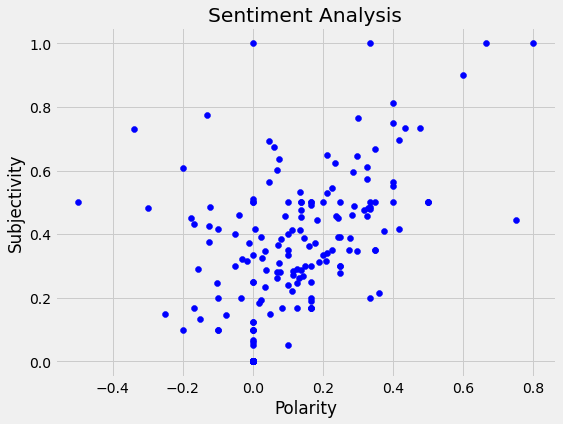

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#get Percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100, 1)

58.5

In [ ]:
#get Percentage of negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100, 1)

14.0

In [ ]:
#get Percentage of tweets
ptweets = df[df.Analysis == 'Neutral']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100, 1)

27.5

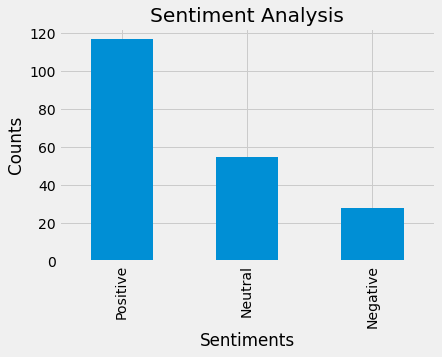

In [ ]:
df['Analysis'].value_counts()

#Plot
plt.title('Sentiment Analysis')
plt.ylabel('Counts')
plt.xlabel('Sentiments')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()